In [1]:
import math
import numpy as np
import scipy as sp
import time
import matplotlib.pyplot as plt
import random

# 2 #

In [2]:
n = [5, 10, 20]

for i in n:
    H = sp.linalg.hilbert(i)
    H_inv = np.linalg.inv(H)
    e = np.ones(i)
    
    v = H @ (H_inv @ e) - e
    print(np.linalg.norm(v, 2), '; condition: ', np.linalg.cond(H, p=2))

4.819013255790991e-12 ; condition:  476607.2502419338
3.881391933470902e-05 ; condition:  16024980732174.455
24.79372203750042 ; condition:  6.806966421072721e+18


# 3 #

In [3]:
def norm1(A):
    return max(np.sum(abs(A), axis=0))
def norm_inf(A):
    return max(np.sum(abs(A), axis=1))

In [4]:
A = np.array([[1, 2], [6, -2]])
print(norm1(A), norm_inf(A))
print(np.linalg.norm(A, 1), np.linalg.norm(A, np.inf))

7 8
7.0 8.0


In [5]:
n = 100 * 2 ** np.arange(8)
n

array([  100,   200,   400,   800,  1600,  3200,  6400, 12800])

In [6]:
my_t = []
py_t = []

for i in n:
    A = np.random.rand(i, i)

    start = time.time()
    norm_inf(A)
    end = time.time()

    my_t.append(end - start)

    start = time.time()
    np.linalg.norm(A, np.inf)
    end = time.time()

    py_t.append(end - start)
my_t = np.array(my_t)
py_t = np.array(py_t)

In [7]:
print(my_t)

[8.79764557e-05 1.59740448e-04 5.85317612e-04 1.93953514e-03
 8.35084915e-03 3.37314606e-02 1.32076025e-01 5.25599003e-01]


In [8]:
print(py_t)

[2.81333923e-05 4.00543213e-05 1.79767609e-04 1.46627426e-03
 6.52408600e-03 3.32775116e-02 1.30890131e-01 5.23015499e-01]


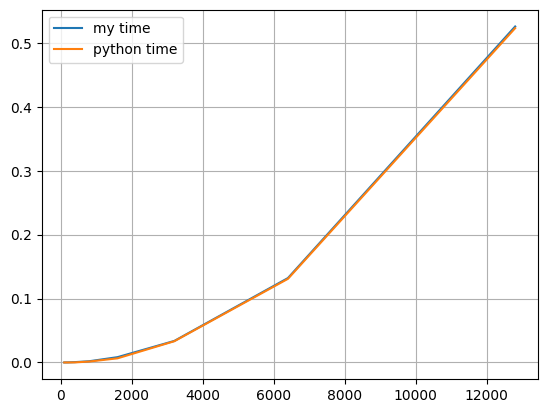

In [9]:
fig, ax = plt.subplots()
ax.plot(n, my_t, label='my time')
ax.plot(n, py_t, label='python time')

ax.grid('on')
ax.legend()
plt.show()

In [10]:
r = my_t / py_t
r

array([3.12711864, 3.98809524, 3.25596817, 1.32276423, 1.28000292,
       1.01364131, 1.00906022, 1.00493963])

In [11]:
print(sum(r) / len(r))

2.000198796613441


In [12]:
print(my_t[1:] / my_t[:-1], '\n', py_t[1:] / py_t[:-1])

[1.81571816 3.6641791  3.31364562 4.30559312 4.0392851  3.91551456
 3.97951864] 
 [1.42372881 4.48809524 8.15649867 4.44943089 5.10071627 3.93329082
 3.99583601]


# 4 #

In [13]:
def mat(phi):
    return np.array([[1, 0], [np.cos(phi), np.sin(phi)]])

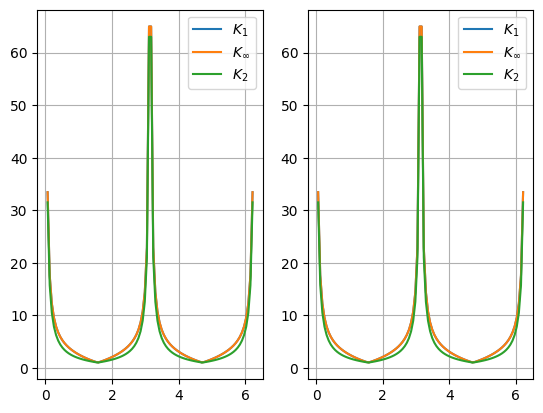

In [14]:
phi = np.linspace(0, 2 * math.pi, 100)
phi = phi[1:-1]

k1 = []
k_inf = []
k2 = []
for i in phi:
    k1.append(np.linalg.cond(mat(i), p=1))
    k_inf.append(np.linalg.cond(mat(i), p=np.inf))
    k2.append(np.linalg.cond(mat(i), p=2))

fig, ax = plt.subplots(1, 2)
ax[0].plot(phi, k1, label='$K_1$')
ax[0].plot(phi, k_inf, label='$K_\infty$')
ax[0].plot(phi, k2, label='$K_2$')

ax[0].grid('on')
ax[0].legend()

k = (1 + abs(np.cos(phi))) * (abs(np.cos(phi)) + abs(np.sin(phi))) / abs(np.sin(phi))
kt = math.sqrt(2) * np.maximum(abs(np.cos(phi / 2)), abs(np.sin(phi / 2))) * np.sqrt(1 + abs(np.cos(phi))) / abs(np.sin(phi))
ax[1].plot(phi, k, label='$K_1$')
ax[1].plot(phi, k, label='$K_\infty$')
ax[1].plot(phi, kt, label='$K_2$')

ax[1].grid('on')
ax[1].legend()

plt.show()

In [15]:
print(max(abs(k2 - kt)), max(abs(k_inf - k)), max(abs(k1 - k)))

1.4210854715202004e-14 1.4210854715202004e-14 7.105427357601002e-15


In [16]:
phi  = 1e-2
A = mat(phi)
A_inv = np.linalg.inv(A)
b = np.array([1, 1])

In [17]:
normA = np.linalg.norm(A, np.inf)
normA_inv = np.linalg.norm(A_inv, np.inf)
normb = np.linalg.norm(b, np.inf)
k = normA * normA_inv
print(normA, normb, k)

1.009949833750832 1.0 201.98828349763807


In [18]:
delta = 1e-3 # dA/A<delta => dA<A*delta
epsA = random.uniform(delta / 2, delta) * normA
epsb = delta * normb
dA = np.random.uniform(low=-1, high=1, size=(2, 2))
dA = dA / np.linalg.norm(dA, np.inf) * epsA
db = np.random.uniform(low=-epsb, high=epsb, size=(2,))
epsA, dA, db

(np.float64(0.0005471732411069199),
 array([[-0.00011775, -0.00018958],
        [-0.00017104, -0.00037614]]),
 array([0.00023627, 0.00018095]))

In [19]:
_A = A + dA
_b = b + db

x = A_inv @ b
_x = np.linalg.inv(_A) @ _b
x, _x

(array([1.        , 0.00500004]), array([1.00035499, 0.00489197]))

In [20]:
relx = np.linalg.norm(x - _x, np.inf) / np.linalg.norm(x, np.inf)
relb = np.linalg.norm(db, np.inf) / normb
relA = np.linalg.norm(dA, np.inf) / normA
relA, relb

(np.float64(0.0005417825943639046), np.float64(0.00023626955978085632))

In [21]:
bound1 = k / (1 - k * relA) * (relb + relA)
bound2 = k / (1 - k * delta) * 2 * delta
print(relx, bound1, bound2)

0.00035498860915117447 0.17646909105688893 0.5062288668716313


In [22]:
print(np.linalg.norm(dA, np.inf), 1 / normA_inv, np.linalg.norm(dA, np.inf) < 1 / normA_inv)

0.0005471732411069199 0.005000041667083337 True


In [23]:
t = 1000

maxrel = 0
for i in range(t):
    dA = np.random.uniform(low=-epsA, high=epsA, size=(2, 2))
    db = np.random.uniform(low=-epsb, high=epsb, size=(2,))

    _A = A + dA
    _b = b + db

    x = np.linalg.inv(A) @ b
    _x = np.linalg.inv(_A) @ _b

    relx = np.linalg.norm(x - _x, np.inf) / np.linalg.norm(x, np.inf)
    relb = np.linalg.norm(db, np.inf) / normb
    relA = np.linalg.norm(dA, np.inf) / normA

    bound = k / (1 - k * relA) * (relb + relA)
    bound = bound

    if relx > bound:
        print('Error')
    maxrel = max(maxrel, relx)

bound2 = k / (1 - k * delta) * 2 * delta
print(maxrel, bound2)

0.28252172938030484 0.5062288668716313
